In [1]:
import numpy as np
import re

In [4]:
file_list_without_simulation = []
for f_name in ('approx_r2_frac50', 'approx_r4_frac50', 'cyclic_s1', 'frac_rep_s1', 'naive_gd'):
    file_list_without_simulation.append('./without_simulation' +'/' + f_name)

In [9]:
stats = {}
for _f in file_list_without_simulation:
    tmp_stat_dict = {}
    file_name = _f.split('/')[-1]
    print("Processing {} ...".format(file_name))
    with open(_f, 'rb') as log_file:
        for line in log_file.readlines():
            line_string = line.rstrip('\n')
            match_elem = re.match("Iteration (.*): Train Loss = (.*), Test Loss = (.*), AUC = (.*), Total time taken =(.*)", line_string)
            if match_elem:
                num_iter, train_loss, test_loss, auc, step_time = int(match_elem.group(1)), float(match_elem.group(2)), float(match_elem.group(3)), float(match_elem.group(4)), float(match_elem.group(5))
                if num_iter == 0:
                    tmp_stat_dict['train_loss'] = [train_loss]
                    tmp_stat_dict['test_loss'] = [test_loss]
                    tmp_stat_dict['auc'] = [auc]
                    tmp_stat_dict['time_stamp'] = [step_time]
                else:
                    tmp_stat_dict['train_loss'].append(train_loss)
                    tmp_stat_dict['test_loss'].append(test_loss)
                    tmp_stat_dict['auc'].append(auc)
                    tmp_stat_dict['time_stamp'].append(step_time+tmp_stat_dict['time_stamp'][-1])
    stats[file_name] = tmp_stat_dict

Processing approx_r2_frac50 ...
Processing approx_r4_frac50 ...
Processing cyclic_s1 ...
Processing frac_rep_s1 ...
Processing naive_gd ...


# Results without Simulating

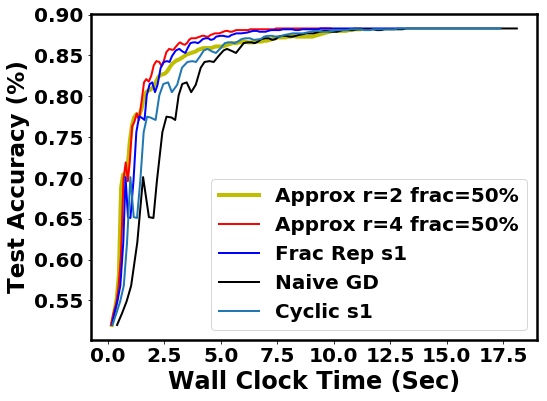

In [11]:
from matplotlib import colors as mcolors
from pylab import *
import numpy as np

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())

rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

plt.plot(stats['approx_r2_frac50']['time_stamp'], stats['approx_r2_frac50']['auc'], color='y', linewidth=4.0, label="Approx r=2 frac=50%")
plt.plot(stats['approx_r4_frac50']['time_stamp'], stats['approx_r4_frac50']['auc'], color='r', linewidth=2.0, label="Approx r=4 frac=50%")
plt.plot(stats['frac_rep_s1']['time_stamp'], stats['frac_rep_s1']['auc'], color='b', linewidth=2.0, label="Frac Rep s1")
#plt.plot(stats['frac_rep_s3']['time_stamp'], stats['frac_rep_s3']['auc'], color='g', linewidth=2.0)
plt.plot(stats['naive_gd']['time_stamp'], stats['naive_gd']['auc'], color='k', linewidth=2.0, label="Naive GD")

plt.plot(stats['cyclic_s1']['time_stamp'], stats['cyclic_s1']['auc'], linewidth=2.0, label="Cyclic s1")
#plt.plot(stats['cyclic_s3']['time_stamp'], stats['cyclic_s3']['auc'], linewidth=2.0)

#plt.ylim(0.8, 0.89)
#plt.xlim(0.5, 7.8)

plt.xlabel("Wall Clock Time (Sec)",fontsize=24, fontweight='bold')
plt.ylabel("Test Accuracy (%)",fontsize=23, fontweight='bold')
plt.xticks(size=20, fontweight='bold')
plt.yticks(size=20, fontweight='bold')

legend_properties = {'weight':'bold', 'size':20}
ax.xaxis.get_offset_text().set_fontsize(22)
ax.xaxis.get_offset_text().set_weight('bold')
plt.legend(prop=legend_properties)

<Figure size 1440x1152 with 0 Axes>

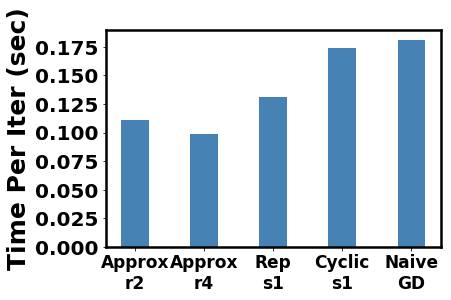

In [12]:
from matplotlib import colors as mcolors
from pylab import *

fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

N = 5
# comp cost, comm cost, decoding cost
#comp_costs.append(_tmp_comp_costs)
#comm_costs.append(_tmp_comm_costs)
#decode_costs.append(_tmp_decode_costs)
def take_avg(l):
    return sum(l) / float(len(l))

time_bar = [stats['approx_r2_frac50']['time_stamp'][-1]/100.0,
           stats['approx_r4_frac50']['time_stamp'][-1]/100.0,
           stats['frac_rep_s1']['time_stamp'][-1]/100.0,
           stats['cyclic_s1']['time_stamp'][-1]/100.0,
           stats['naive_gd']['time_stamp'][-1]/100.0,]

ind = np.arange(N)  # the x locations for the groups
width = 0.4      # the width of the bars

fig, ax = plt.subplots()
# GM
rects1 = ax.bar(ind+width/2.0, time_bar, width, color=colors['steelblue'])

# add some text for labels, title and axes ticks
ax.set_ylabel("Time Per Iter (sec)",fontsize=25, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Approx\nr2', 'Approx\nr4', 'Rep\ns1', 'Cyclic\ns1', 'Naive\nGD'))
#ax.legend()

#ax.set_ylim(0, 500)
plt.xticks(size=17, fontweight='bold')
plt.yticks(size=20, fontweight='bold')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0),size=20)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

legend_properties = {'weight':'bold', 'size':20}

plt.show()

# Simulating Stragglers with 2s Delay

In [13]:
file_list_without_simulation = []
for f_name in ('approx_r2_frac50', 'approx_r4_frac50', 'cyclic_s1', 'frac_rep_s1', 'naive_gd'):
    file_list_without_simulation.append('./straggler_simulation_2s' +'/' + f_name)

In [14]:
stats = {}
for _f in file_list_without_simulation:
    tmp_stat_dict = {}
    file_name = _f.split('/')[-1]
    print("Processing {} ...".format(file_name))
    with open(_f, 'rb') as log_file:
        for line in log_file.readlines():
            line_string = line.rstrip('\n')
            match_elem = re.match("Iteration (.*): Train Loss = (.*), Test Loss = (.*), AUC = (.*), Total time taken =(.*)", line_string)
            if match_elem:
                num_iter, train_loss, test_loss, auc, step_time = int(match_elem.group(1)), float(match_elem.group(2)), float(match_elem.group(3)), float(match_elem.group(4)), float(match_elem.group(5))
                if num_iter == 0:
                    tmp_stat_dict['train_loss'] = [train_loss]
                    tmp_stat_dict['test_loss'] = [test_loss]
                    tmp_stat_dict['auc'] = [auc]
                    tmp_stat_dict['time_stamp'] = [step_time]
                else:
                    tmp_stat_dict['train_loss'].append(train_loss)
                    tmp_stat_dict['test_loss'].append(test_loss)
                    tmp_stat_dict['auc'].append(auc)
                    tmp_stat_dict['time_stamp'].append(step_time+tmp_stat_dict['time_stamp'][-1])
    stats[file_name] = tmp_stat_dict

Processing approx_r2_frac50 ...
Processing approx_r4_frac50 ...
Processing cyclic_s1 ...
Processing frac_rep_s1 ...
Processing naive_gd ...


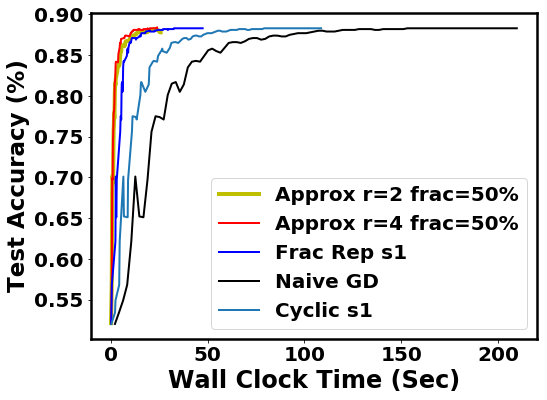

In [15]:
from matplotlib import colors as mcolors
from pylab import *
import numpy as np

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())

rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

plt.plot(stats['approx_r2_frac50']['time_stamp'], stats['approx_r2_frac50']['auc'], color='y', linewidth=4.0, label="Approx r=2 frac=50%")
plt.plot(stats['approx_r4_frac50']['time_stamp'], stats['approx_r4_frac50']['auc'], color='r', linewidth=2.0, label="Approx r=4 frac=50%")
plt.plot(stats['frac_rep_s1']['time_stamp'], stats['frac_rep_s1']['auc'], color='b', linewidth=2.0, label="Frac Rep s1")
#plt.plot(stats['frac_rep_s3']['time_stamp'], stats['frac_rep_s3']['auc'], color='g', linewidth=2.0)
plt.plot(stats['naive_gd']['time_stamp'], stats['naive_gd']['auc'], color='k', linewidth=2.0, label="Naive GD")

plt.plot(stats['cyclic_s1']['time_stamp'], stats['cyclic_s1']['auc'], linewidth=2.0, label="Cyclic s1")
#plt.plot(stats['cyclic_s3']['time_stamp'], stats['cyclic_s3']['auc'], linewidth=2.0)

#plt.ylim(0.8, 0.89)
#plt.xlim(0.5, 7.8)

plt.xlabel("Wall Clock Time (Sec)",fontsize=24, fontweight='bold')
plt.ylabel("Test Accuracy (%)",fontsize=23, fontweight='bold')
plt.xticks(size=20, fontweight='bold')
plt.yticks(size=20, fontweight='bold')

legend_properties = {'weight':'bold', 'size':20}
ax.xaxis.get_offset_text().set_fontsize(22)
ax.xaxis.get_offset_text().set_weight('bold')
plt.legend(prop=legend_properties)

<Figure size 1440x1152 with 0 Axes>

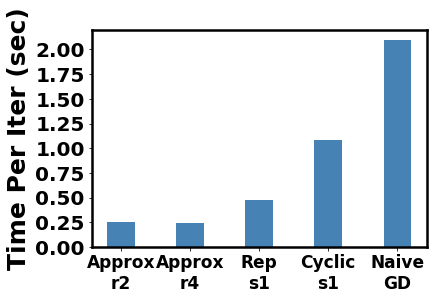

In [16]:
from matplotlib import colors as mcolors
from pylab import *

fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

N = 5
# comp cost, comm cost, decoding cost
#comp_costs.append(_tmp_comp_costs)
#comm_costs.append(_tmp_comm_costs)
#decode_costs.append(_tmp_decode_costs)
def take_avg(l):
    return sum(l) / float(len(l))

time_bar = [stats['approx_r2_frac50']['time_stamp'][-1]/100.0,
           stats['approx_r4_frac50']['time_stamp'][-1]/100.0,
           stats['frac_rep_s1']['time_stamp'][-1]/100.0,
           stats['cyclic_s1']['time_stamp'][-1]/100.0,
           stats['naive_gd']['time_stamp'][-1]/100.0,]

ind = np.arange(N)  # the x locations for the groups
width = 0.4      # the width of the bars

fig, ax = plt.subplots()
# GM
rects1 = ax.bar(ind+width/2.0, time_bar, width, color=colors['steelblue'])

# add some text for labels, title and axes ticks
ax.set_ylabel("Time Per Iter (sec)",fontsize=25, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Approx\nr2', 'Approx\nr4', 'Rep\ns1', 'Cyclic\ns1', 'Naive\nGD'))
#ax.legend()

#ax.set_ylim(0, 500)
plt.xticks(size=17, fontweight='bold')
plt.yticks(size=20, fontweight='bold')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0),size=20)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

legend_properties = {'weight':'bold', 'size':20}

plt.show()

# Simulating Stragglers with 3.5s Delay

In [17]:
file_list_without_simulation = []
for f_name in ('approx_r2_frac50', 'approx_r4_frac50', 'cyclic_s1', 'frac_rep_s1', 'naive_gd'):
    file_list_without_simulation.append('./straggler_simulation_3.5s' +'/' + f_name)

In [18]:
stats = {}
for _f in file_list_without_simulation:
    tmp_stat_dict = {}
    file_name = _f.split('/')[-1]
    print("Processing {} ...".format(file_name))
    with open(_f, 'rb') as log_file:
        for line in log_file.readlines():
            line_string = line.rstrip('\n')
            match_elem = re.match("Iteration (.*): Train Loss = (.*), Test Loss = (.*), AUC = (.*), Total time taken =(.*)", line_string)
            if match_elem:
                num_iter, train_loss, test_loss, auc, step_time = int(match_elem.group(1)), float(match_elem.group(2)), float(match_elem.group(3)), float(match_elem.group(4)), float(match_elem.group(5))
                if num_iter == 0:
                    tmp_stat_dict['train_loss'] = [train_loss]
                    tmp_stat_dict['test_loss'] = [test_loss]
                    tmp_stat_dict['auc'] = [auc]
                    tmp_stat_dict['time_stamp'] = [step_time]
                else:
                    tmp_stat_dict['train_loss'].append(train_loss)
                    tmp_stat_dict['test_loss'].append(test_loss)
                    tmp_stat_dict['auc'].append(auc)
                    tmp_stat_dict['time_stamp'].append(step_time+tmp_stat_dict['time_stamp'][-1])
    stats[file_name] = tmp_stat_dict

Processing approx_r2_frac50 ...
Processing approx_r4_frac50 ...
Processing cyclic_s1 ...
Processing frac_rep_s1 ...
Processing naive_gd ...


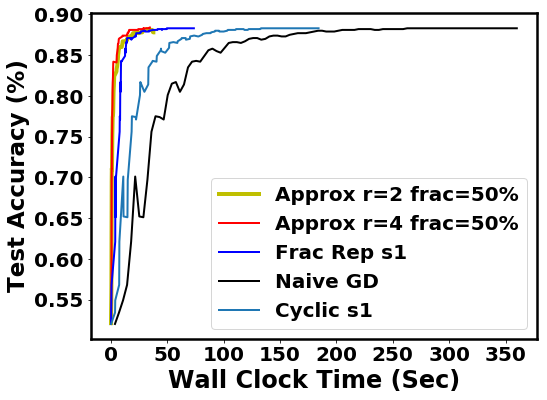

In [19]:
from matplotlib import colors as mcolors
from pylab import *
import numpy as np

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())

rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

fig = plt.figure(figsize=(8, 6))
ax = plt.subplot(111)

plt.plot(stats['approx_r2_frac50']['time_stamp'], stats['approx_r2_frac50']['auc'], color='y', linewidth=4.0, label="Approx r=2 frac=50%")
plt.plot(stats['approx_r4_frac50']['time_stamp'], stats['approx_r4_frac50']['auc'], color='r', linewidth=2.0, label="Approx r=4 frac=50%")
plt.plot(stats['frac_rep_s1']['time_stamp'], stats['frac_rep_s1']['auc'], color='b', linewidth=2.0, label="Frac Rep s1")
#plt.plot(stats['frac_rep_s3']['time_stamp'], stats['frac_rep_s3']['auc'], color='g', linewidth=2.0)
plt.plot(stats['naive_gd']['time_stamp'], stats['naive_gd']['auc'], color='k', linewidth=2.0, label="Naive GD")

plt.plot(stats['cyclic_s1']['time_stamp'], stats['cyclic_s1']['auc'], linewidth=2.0, label="Cyclic s1")
#plt.plot(stats['cyclic_s3']['time_stamp'], stats['cyclic_s3']['auc'], linewidth=2.0)

#plt.ylim(0.8, 0.89)
#plt.xlim(0.5, 7.8)

plt.xlabel("Wall Clock Time (Sec)",fontsize=24, fontweight='bold')
plt.ylabel("Test Accuracy (%)",fontsize=23, fontweight='bold')
plt.xticks(size=20, fontweight='bold')
plt.yticks(size=20, fontweight='bold')

legend_properties = {'weight':'bold', 'size':20}
ax.xaxis.get_offset_text().set_fontsize(22)
ax.xaxis.get_offset_text().set_weight('bold')
plt.legend(prop=legend_properties)

<Figure size 1440x1152 with 0 Axes>

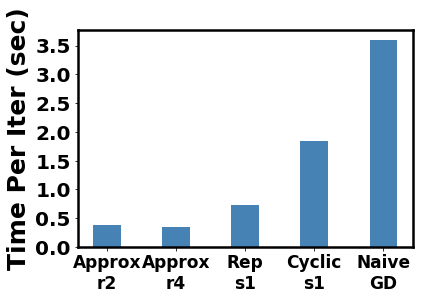

In [20]:
from matplotlib import colors as mcolors
from pylab import *

fig = plt.figure(figsize=(20, 16))
#fig = plt.figure(figsize=(6, 4))

colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

# Sort colors by hue, saturation, value and name.
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgba(color)[:3])), name)
                for name, color in colors.items())
rc('axes', linewidth=2.5)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

N = 5
# comp cost, comm cost, decoding cost
#comp_costs.append(_tmp_comp_costs)
#comm_costs.append(_tmp_comm_costs)
#decode_costs.append(_tmp_decode_costs)
def take_avg(l):
    return sum(l) / float(len(l))

time_bar = [stats['approx_r2_frac50']['time_stamp'][-1]/100.0,
           stats['approx_r4_frac50']['time_stamp'][-1]/100.0,
           stats['frac_rep_s1']['time_stamp'][-1]/100.0,
           stats['cyclic_s1']['time_stamp'][-1]/100.0,
           stats['naive_gd']['time_stamp'][-1]/100.0,]

ind = np.arange(N)  # the x locations for the groups
width = 0.4      # the width of the bars

fig, ax = plt.subplots()
# GM
rects1 = ax.bar(ind+width/2.0, time_bar, width, color=colors['steelblue'])

# add some text for labels, title and axes ticks
ax.set_ylabel("Time Per Iter (sec)",fontsize=25, fontweight='bold')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Approx\nr2', 'Approx\nr4', 'Rep\ns1', 'Cyclic\ns1', 'Naive\nGD'))
#ax.legend()

#ax.set_ylim(0, 500)
plt.xticks(size=17, fontweight='bold')
plt.yticks(size=20, fontweight='bold')
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0),size=20)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

legend_properties = {'weight':'bold', 'size':20}

plt.show()